In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("superstore_sales.xlsx")
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [4]:
data.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [95]:
data["profit"].max()

8399.975999999999

# Which are the most selling products?

In [93]:
products = data.groupby('product_name').agg({'quantity': 'sum'}).sort_values("quantity" , ascending = False)[:20]
#["quantity"].sum().sort_values(ascending = False)[:10]
products

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


<AxesSubplot:xlabel='product_name'>

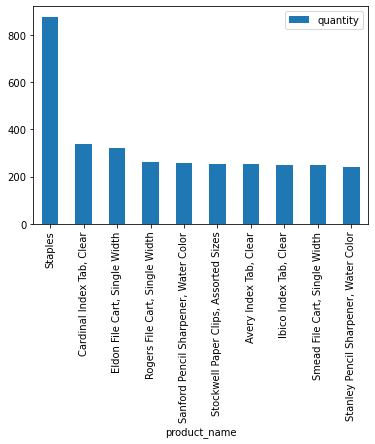

In [8]:
products[0:10].plot(kind = "bar")

# Which are the Top 10 products by sales?# 

In [96]:
products_sales = data.groupby('product_name')["sales"].sum().sort_values(ascending = False)[:10]
#["sales"].sum().sort_values(ascending = False)[:10]
products_sales = pd.DataFrame(products_sales)
products_sales.head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


# Which are the most profitable products?

In [98]:
products_profit = data.groupby('product_name')["profit"].sum().sort_values(ascending = False)[:10]
#["sprofit"].sum().sort_values(ascending = False)[:10]
products_profit = pd.DataFrame(products_profit)
products_profit.head(10)

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(8, 0, 'Nokia Smart Phone, with Caller ID'),
  Text(9, 0, 'Belkin Router, USB')])

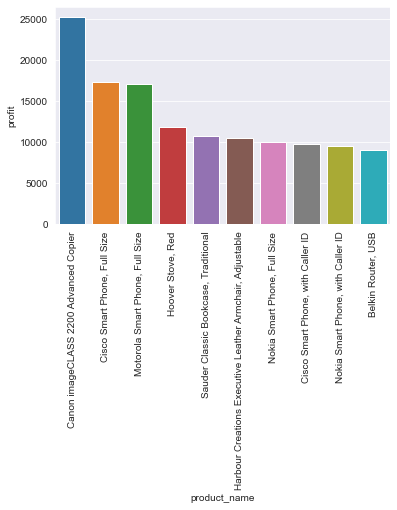

In [99]:
sns.barplot(x='product_name', y = 'profit', data = products_profit[:10].reset_index())

#sns.barplot(x='product_name',y='profit',data=products_profit.head(10).reset_index())
plt.xticks(rotation = 'vertical')

# - What category sold the most?

In [12]:
category_sales = data.groupby(["category"])['sales'].sum().sort_values(ascending = False)
category_sales = pd.DataFrame(category_sales)                                                                       
category_sales

,sales
category,
Technology,4.744557e+06
Furniture,4.110874e+06
Office Supplies,3.787070e+06


# Which are the most profitable category?

In [13]:
category_profit = data.groupby(["category"])['profit'].sum().sort_values( ascending = False)
category_profit = pd.DataFrame(category_profit)
category_profit

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


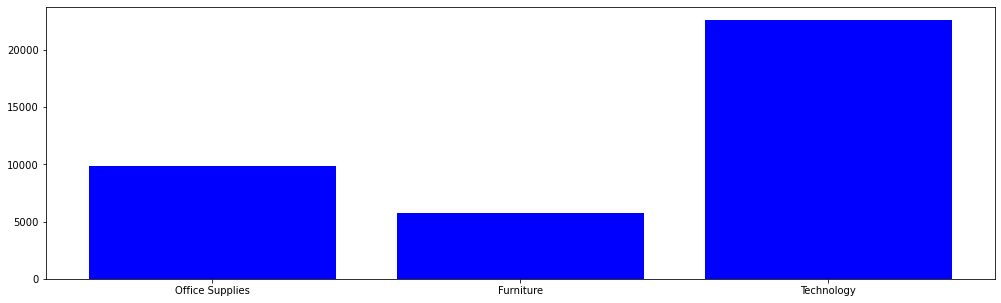

In [14]:
plt.figure(figsize=(17, 5))
plt.bar(data['category'],data['sales'],color = 'b')
plt.show()

# Total sales values by category and subcategory

In [15]:
category_sub_sales = data.groupby(['sub_category'])["sales"].sum().sort_values( ascending = False)
category_sub_sales = pd.DataFrame(category_sub_sales)
category_sub_sales.head(10)

,sales
sub_category,
Phones,1.706824e+06
Copiers,1.509436e+06
Chairs,1.501682e+06
Bookcases,1.466572e+06
Storage,1.127086e+06
Appliances,1.011064e+06
Machines,7.790601e+05
Tables,7.570419e+05
Accessories,7.492370e+05


<AxesSubplot:xlabel='category', ylabel='sales'>

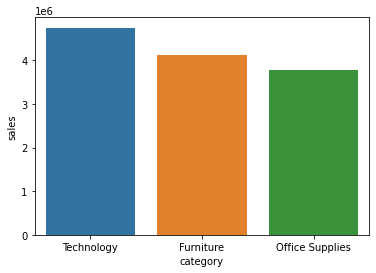

In [16]:
sns.barplot(x='category', y = 'sales', data = category_sales.reset_index())


<AxesSubplot:xlabel='sub_category', ylabel='sales'>

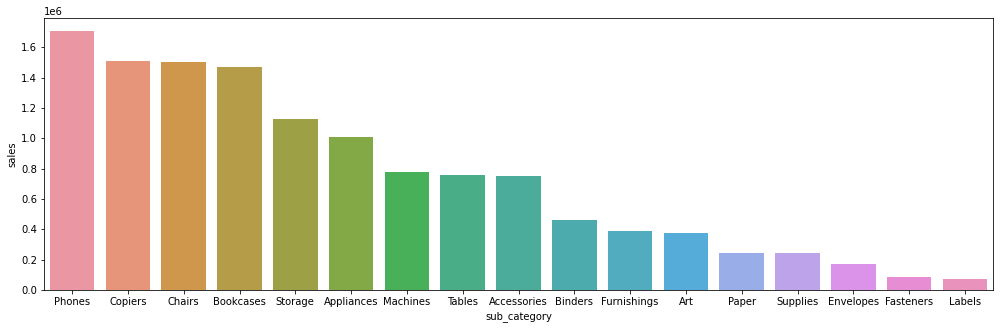

In [17]:
plt.figure(figsize=(17, 5))
sns.barplot(x='sub_category', y = 'sales', data = category_sub_sales.reset_index())

# Which are the most selling products in subcategory?

In [21]:
products_subcategory = data.groupby(['sub_category']).agg({'quantity': 'sum'}).sort_values("quantity" , ascending = False)
products_subcategory

,quantity
sub_category,
Binders,21429
Storage,16917
Art,16301
Paper,12822
Chairs,12336
Phones,11870
Furnishings,11225
Accessories,10946
Labels,9322


<AxesSubplot:xlabel='sub_category', ylabel='quantity'>

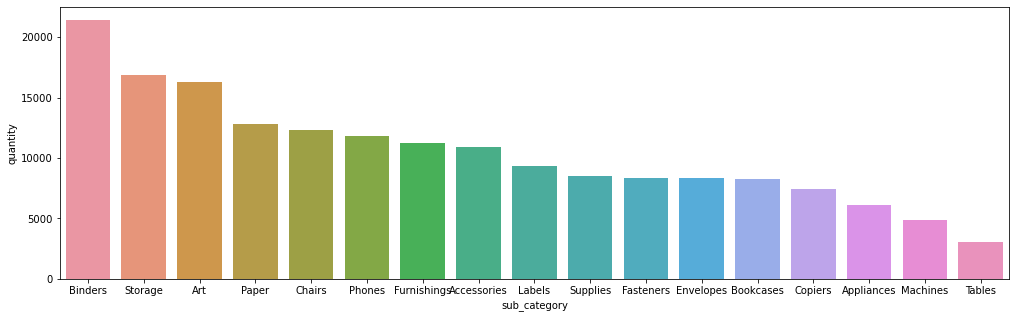

In [25]:
plt.figure(figsize = (17,5))
sns.barplot(x='sub_category', y = 'quantity', data = products_subcategory.reset_index())

# Which customer segments are the most profitable ?

In [26]:
segment_profit = data.groupby(['segment']).agg({'profit': 'sum'}).sort_values("profit" , ascending = False)
segment_profit

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


<AxesSubplot:xlabel='segment', ylabel='profit'>

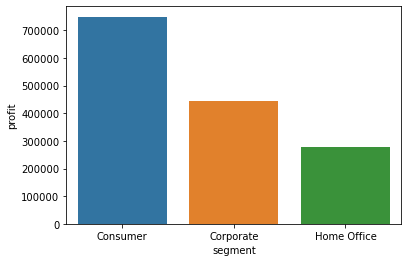

In [28]:
sns.barplot(x ="segment" , y = "profit" , data = segment_profit.reset_index())

# What shipping modes sold the most products?

In [29]:
ship_mode_soled = data.groupby(['ship_mode']).agg({'sales': 'sum'}).sort_values("sales" , ascending = False)
ship_mode_soled

,sales
ship_mode,
Standard Class,7.578652e+06
Second Class,2.565672e+06
First Class,1.830976e+06
Same Day,6.672020e+05


<AxesSubplot:xlabel='ship_mode', ylabel='sales'>

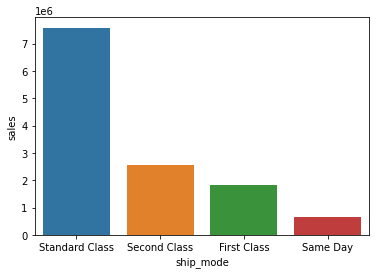

In [30]:
sns.barplot(x ="ship_mode" , y = "sales" , data = ship_mode_soled.reset_index())

# What market sold the most products?

In [32]:

market_soled = data.groupby(['market']).agg({'sales': 'sum'}).sort_values("sales" , ascending = False)
market_soled

,sales
market,
APAC,3.585744e+06
EU,2.938089e+06
US,2.297201e+06
LATAM,2.164605e+06
EMEA,8.061613e+05
Africa,7.837732e+05
Canada,6.692817e+04


<AxesSubplot:xlabel='market', ylabel='sales'>

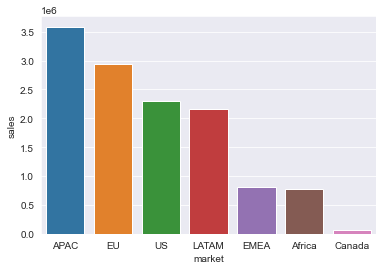

In [39]:
sns.set_style('darkgrid')
sns.barplot(x ="market" , y = "sales" , data = market_soled.reset_index())

# Which are the Top 10 country by sales?

In [42]:
country_soled = data.groupby(['country']).agg({'sales': 'sum'}).sort_values("sales" , ascending = False)[:10]
country_soled

,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


<AxesSubplot:xlabel='country', ylabel='sales'>

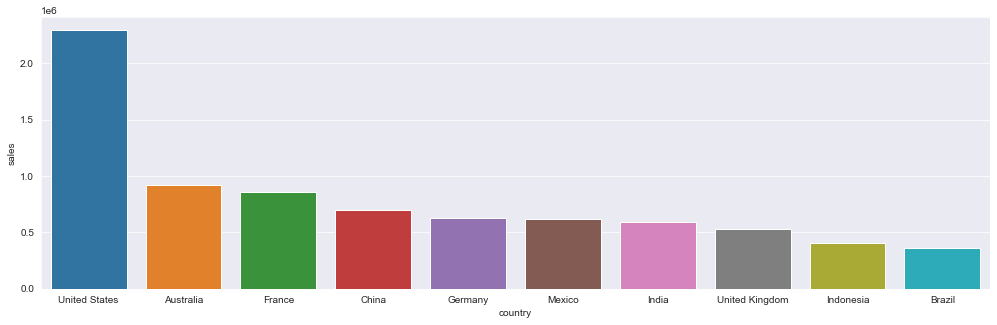

In [47]:
plt.figure(figsize = (17,5))
sns.set_style('darkgrid')
sns.barplot(x ="country" , y = "sales" , data = country_soled.reset_index())

<AxesSubplot:ylabel='sales'>

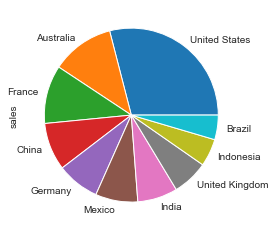

In [52]:
country_soled['sales'].plot(kind='pie')

# Which are the average shipping cost for top 10 different countries?

In [56]:
#shipping_cost
country_shipping_cost = data.groupby(['country']).agg({'shipping_cost': 'mean'}).sort_values("shipping_cost" , ascending = False)[:10]
country_shipping_cost

,shipping_cost
country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


# Who are the top-10 most profitable customers?

In [58]:
customer_name_profit = data.groupby(['customer_name']).agg({'profit': 'sum'}).sort_values("profit" , ascending = False)[:10]
customer_name_profit

,profit
customer_name,
Tamara Chand,8672.89890
Raymond Buch,8453.04950
Sanjit Chand,8205.37990
Hunter Lopez,7816.56778
Bill Eplett,7410.00530
Harry Marie,6958.28640
Susan Pistek,6484.40726
Mike Gockenbach,6458.67620
Adrian Barton,6417.28450


Add a ne column (month)

In [60]:
data["month"] = pd.DatetimeIndex(data['ship_date']).month
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,1


# Total sales values by year and month?

In [62]:
sales_mont_year = data.groupby(['year','month']).sum()
sales_mont_year 

sales  quantity  discount       profit  shipping_cost
year month                                                              
2011 1      123992.67926      1862    80.948  13657.04576    13201.06500
     2       96300.77016      1300    52.650  12459.16326    10395.09500
     3      134792.85804      1651    67.842  13654.24124    12210.12750
     4      121193.04872      2041    82.374  12934.36052    13615.47900
     5      139563.72662      2052    87.424  11691.47372    15472.55300
     6      207031.96456      2912   141.660  22294.52496    23291.21300
     7      132847.72166      2019    96.408   7590.69836    13474.10000
     8      192058.67212      2847   113.700  25762.79472    20634.64200
     9      271128.44882      3488   127.926  32069.85112    28089.96200
     10     227750.57606      3031   124.146  26847.69446    23381.65800
     11     289186.43460      3773   164.674  32914.97670    33971.56200
     12     323603.99492      4467   193.642  37063.98672    36532.88900
2012 1      160701.37510      2215    89.236  13136.25180    16260.21000
     2      101285.04032      1551    61.536  15959.17902    11200.11500
     3      157703.83278      2088    93.220  17908.54488    15293.83000
     4      157671.52820      2177    98.382  14271.85470    16971.47700
     5      200791.07714      2852   108.810  32980.96414    23067.38300
     6      246931.58892      3570   165.794  29003.82732    26886.96600
     7      170946.33826      2550   109.832  21047.95486    19993.03000
     8      264788.59414      3585   135.558  35652.02014    28509.49600
     9      307156.66064      4247   164.790  33395.92304    30062.45600
     10     260076.58320      3536   135.236  30511.48770    25333.69200
     11     306585.02834      5040   208.986  30097.28594    31236.68300
     12     342801.04736      4700   177.394  33449.98556    38675.48600
2013 1      227628.49798      2683   108.184  27279.22398    23701.36800
     2      167858.42288      2176    77.200  25639.37138    16643.65800
     3      204213.25824      2679   115.286  23676.32484    22224.32900
     4      176577.96258      2723   124.690  18825.14298    19143.22000
     5      221194.82572      3416   133.984  25398.55652    24512.42300
     6      403254.04892      5297   221.470  42822.99302    43116.96800
     7      260978.61262      3622   129.110  34394.52382    27884.64336
     8      304761.08938      4500   188.684  29293.24668    32941.45000
     9      383262.03734      5927   241.268  41501.33154    39569.95200
     10     294879.13492      3903   167.102  41798.49762    30958.14800
     11     338289.72306      5363   215.408  47019.56736    38694.91500
     12     422848.83574      5847   213.136  50863.98044    45157.67000
2014 1      261368.73318      3643   155.636  29279.25438    25793.69200
     2      193663.96800      2520   112.664  21962.71380    21610.67800
     3      264233.61746      3752   146.316  36567.39326    27130.00054
     4      243544.85668      3585   157.848  25838.86258    26100.58800
     5      273802.41198      4141   183.798  29344.93218    30482.82200
     6      396496.40594      5853   246.490  45702.36124    41631.62300
     7      267996.34398      3918   173.480  29772.87768    29712.45700
     8      449538.51770      5704   215.782  51464.57200    46803.04600
     9      475604.62900      6606   256.972  65432.54730    52781.22800
     10     424785.85586      5876   233.000  59077.43456    44798.97700
     11     533519.23300      7578   300.002  63773.59420    58135.71000
     12     515311.29778      7446   330.050  45949.42728    55524.96800

# Total sales chart by the year?

<AxesSubplot:xlabel='year', ylabel='sales'>

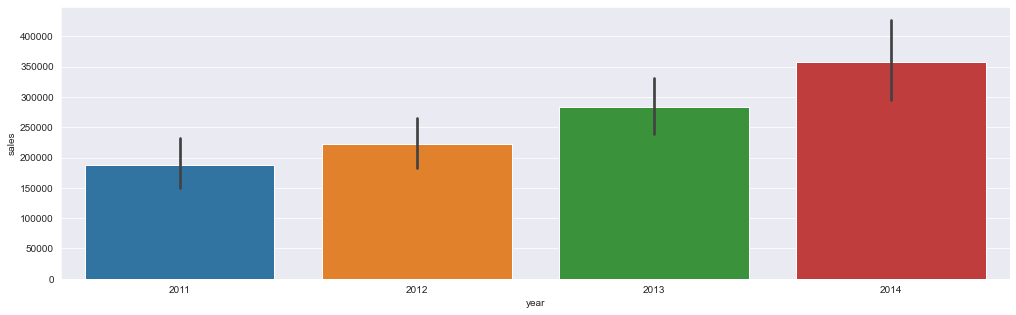

In [64]:
plt.figure(figsize = (17,5))
sns.set_style('darkgrid')
sns.barplot(x ="year" , y = "sales" , data = sales_mont_year.reset_index())

In [71]:
data.to_csv("data_sales.csv" , index=False)

In [72]:
df = pd.read_csv("data_sales.csv")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,1


In [94]:
products.to_csv("products.csv" )

In [97]:
products_sales.to_csv("products_sales.csv" )

In [100]:
products_profit.to_csv("products_profit.csv" )

In [82]:
category_sales.to_csv("category_sales.csv"  )

In [83]:
category_sub_sales.to_csv("category_sub_sales.csv" )

In [84]:
products_subcategory.to_csv("products_subcategor.csv" )

In [85]:
segment_profit.to_csv("segment_profitproducts.csv" )

In [86]:
ship_mode_soled.to_csv("ship_mode_soled.csv" )

In [87]:
market_soled.to_csv("market_soled.csv" )

In [88]:
market_soled.to_csv("market_soled.csv" )

In [89]:
country_soled.to_csv("country_soled.csv" )

In [90]:
country_shipping_cost.to_csv("country_shipping_cost.csv" )

In [91]:
customer_name_profit.to_csv("customer_name_profit.csv" )

In [92]:
sales_mont_year.to_csv("psales_mont_year.csv" )